In [1]:
import pydot, sklearn.datasets
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import numpy as np
import itertools as it
import seaborn as sns
import pandas as pd
%pylab --no-import-all inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading example dataset: IRIS dataset
iris = sklearn.datasets.load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.feature_names)
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Performance Expectations

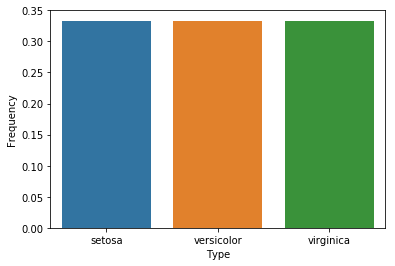

In [6]:
tab = pd.DataFrame({
    'Type': ['setosa', 'versicolor', 'virginica'],
    'Frequency': [len([i for i in iris.target if i == 0]) / len(iris.target), 
                  len([i for i in iris.target if i == 1]) / len(iris.target), 
                  len([i for i in iris.target if i == 2]) / len(iris.target)]
})
sns.barplot(x='Type', y='Frequency', data=tab)

In [11]:
# Instantiate Decision Tree classifier
from sklearn import neighbors
knn_e = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_e.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn import neighbors

In [33]:
# Instantiate K-NN Classifier
knn_euciledean = neighbors.KNeighborsClassifier(n_neighbors=1)

In [9]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
X_train, X_test = iris.data[train_index], iris.data[test_index]

NameError: name 'train_index' is not defined

In [14]:
# K-fold construction
folds = 5
kf = cross_validation.KFold(len(iris.data), n_folds=folds, shuffle=True) 

# K-fold cross validation and performance evaluation
foldid = 0
totacc = 0.
ytlog = []
yplog = []
for train_index, test_index in kf:
    foldid += 1
    print("Starting Fold %d" % foldid)
    print("\tTRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    totacc += acc
    ytlog += list(y_test)
    yplog += list(y_pred)
    
    print('\tPrediction: ', y_pred)
    print('\tCorrect:    ', y_test)
    print('\tAccuracy:', acc)
#     print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Average Accuracy: %0.3f" % (totacc / folds,))
print(classification_report(ytlog, yplog, target_names=iris.target_names))


Starting Fold 1
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
	Accuracy: 0.9333333333333333
Starting Fold 2
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
	Accuracy: 1.0
Starting Fold 3
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
	Accuracy: 0.9666666666666667
Starting Fold 4
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
	Accuracy: 1.0
Starting Fold 5
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 2]
	Correct:     [0 0 0 0 0 0 0 1 1 1 1 1 1 

In [16]:
print(kf)

sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=True, random_state=None)


In [23]:
len(iris.target)

150

In [18]:
train_index=list(range(120))

In [19]:
test_index=list(range(120,150))

In [20]:
X_train, X_test = iris.data[train_index], iris.data[test_index]

In [24]:
X_train=iris.data

In [25]:
Y_train=iris.target

In [26]:
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
y_pred = clf.predict(X_train)

In [29]:
acc = accuracy_score(y_pred, Y_train)

In [30]:
acc

1.0

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Show the decision tree.

In [29]:
with open("iris.dot", 'w') as f: 
    f = tree.export_graphviz(clf, out_file=f,
        feature_names=iris.feature_names,  
        class_names=iris.target_names)
# Now, we just need to run `dot -Tpng iris.dot -o tree.png` to convert it to PNG

In [5]:
# Sources:
# http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/18_IntermediateSklearn
# http://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# http://scikit-learn.org/stable/auto_examples/plot_confusion_matrix.html#example-plot-confusion-matrix-py
# http://scikit-learn.org/stable/modules/cross_validation.html
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
# http://scikit-learn.org/stable/modules/tree.html
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html